1. Perform linear regression to predict
The selling price of a used car. Dataset: used_cars_dataset.csv
Evaluate the quality of the models by computing relevant performance metrics, including the R² value. Generate and display a plot that compares the actual values to the predicted values (Actual vs Predicted) for both tasks.

To apply the steps from fuel_consumption.ipynb to `used_car.ipynb`, we will follow the same structure and adapt it to the `used_cars_dataset.csv`. Below is the updated code and explanation:

---

### **1. Import Required Libraries**
We import the necessary libraries for data manipulation, visualization, and machine learning.



In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder



---

### **2. Load the Dataset**
The dataset (`used_cars_dataset.csv`) is loaded into a Pandas DataFrame.



In [19]:
# Load dataset
df = pd.read_csv('used_cars_dataset.csv')




---

### **3. Clean Missing Data**
Handle missing values by replacing `?` with `pd.NA` and dropping rows with missing data.



In [20]:
# Replace '?' with pd.NA and drop missing values
df.replace("?", pd.NA, inplace=True)
df.dropna(inplace=True)



---

### **4. Encode Categorical Columns**
Convert categorical columns into numeric values using `LabelEncoder`.



In [21]:
# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to all object (categorical) columns
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])



---

### **5. Visualize Correlations**
Generate a correlation matrix and visualize it using a heatmap.



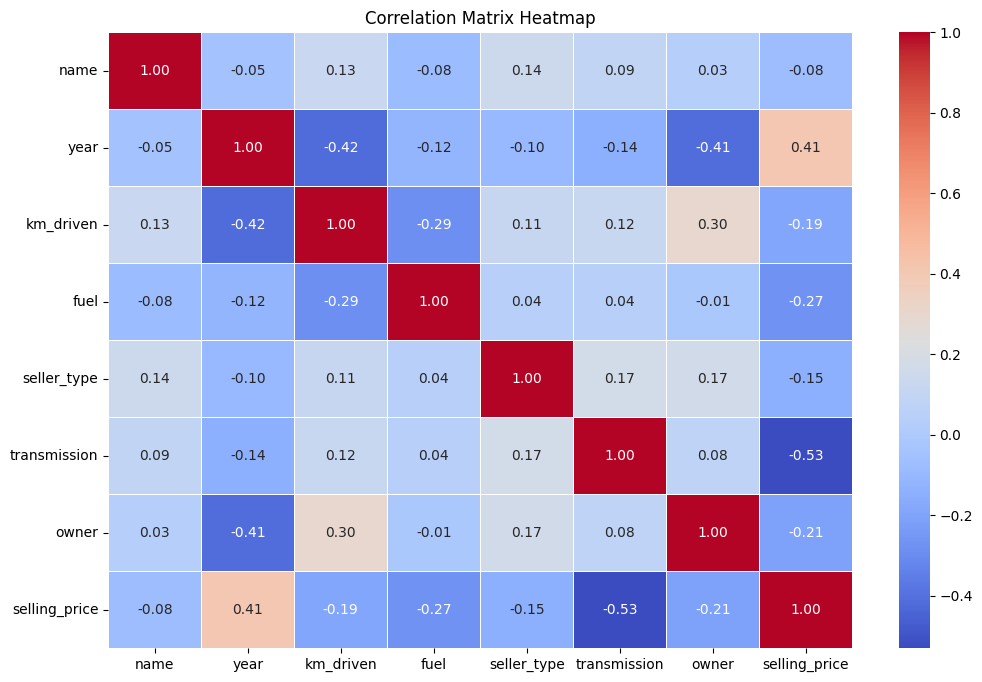

In [22]:
# Generate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()



---

### **6. Filter Correlations by Threshold**
Identify features that are highly correlated with the target variable (`selling_price`) using a threshold.



In [ ]:
# Set a threshold for correlation
threshold = 0.2

# Find features highly correlated with the target variable
correlated_features = correlation_matrix['selling_price']  # Replace 'selling_price' with your target column name
feature_x = correlated_features[correlated_features.abs() > threshold].index.tolist()

# Remove the target variable itself from the list
feature_x.remove('selling_price')  # Replace 'selling_price' with your target column name

print("Highly correlated features with the target variable:")
print(feature_x)

Highly correlated features with the target variable:
['year', 'fuel', 'transmission', 'owner']




---

### **7. Prepare Features and Target**
Separate the dataset into features (`X`) and the target variable (`y`).



In [32]:
# Prepare features and target
X = df.iloc[:, :-1]  # All columns except the last
y = df.iloc[:, -1]   # Last column (selling price)

# Prepare selected features based on correlation
X_sel = df[feature_x]
y_sel = df['selling_price']  # Replace 'selling_price' with your target column name



---

### **8. Split Data into Training and Testing Sets**
Split the data into training (80%) and testing (20%) sets for both all features and selected features.



In [33]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_sel, y, test_size=0.2, random_state=42)



---

### **9. Train the Linear Regression Model**
Train two linear regression models:
1. Using all features.
2. Using only the selected features.



In [34]:
# Train the model using all features
model_all = LinearRegression()
model_all.fit(X_train, y_train)

# Train the model using selected features
model_sel = LinearRegression()
model_sel.fit(X_train_sel, y_train_sel)

LinearRegression()



---

### **10. Make Predictions**
Use the trained models to predict the target variable for the test data.



In [35]:
# Make predictions using all features
y_pred_all = model_all.predict(X_test)

# Make predictions using selected features
y_pred_sel = model_sel.predict(X_test_sel)



---

### **11. Evaluate the Models**
Evaluate the models' performance using R² Score and Mean Squared Error (MSE).



In [36]:
# Evaluate the model using all features
r2_all = r2_score(y_test, y_pred_all)
mse_all = mean_squared_error(y_test, y_pred_all)
print("\nUsing all features:")
print(f"R² Score: {r2_all:.4f}")
print(f"Mean Squared Error: {mse_all:.4f}")

# Evaluate the model using selected features
r2_sel = r2_score(y_test_sel, y_pred_sel)
mse_sel = mean_squared_error(y_test_sel, y_pred_sel)
print("\nUsing selected features:")
print(f"R² Score: {r2_sel:.4f}")
print(f"Mean Squared Error: {mse_sel:.4f}")


Using all features:
R² Score: 0.3960
Mean Squared Error: 184332080354.4866

Using selected features:
R² Score: 0.3500
Mean Squared Error: 198370187183.8057




---

### **12. Visualize Actual vs Predicted Values**
Generate scatter plots to compare the actual and predicted selling prices for both models.

#### Using All Features:


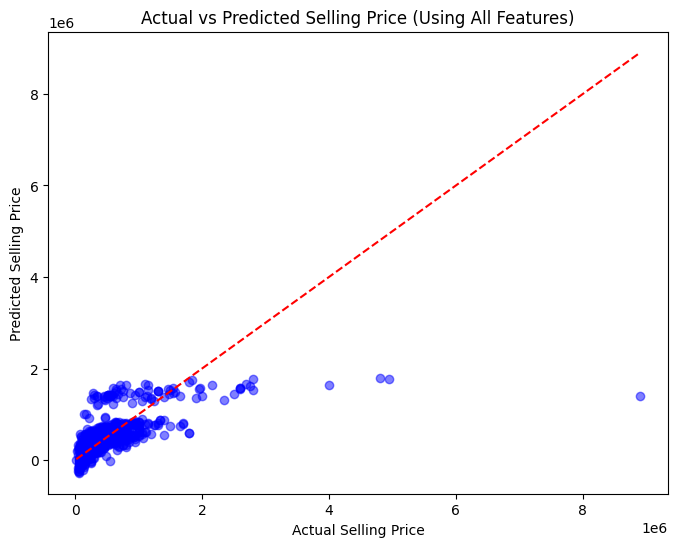

In [37]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_all, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='dashed')
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price (Using All Features)")
plt.show()



#### Using Selected Features:


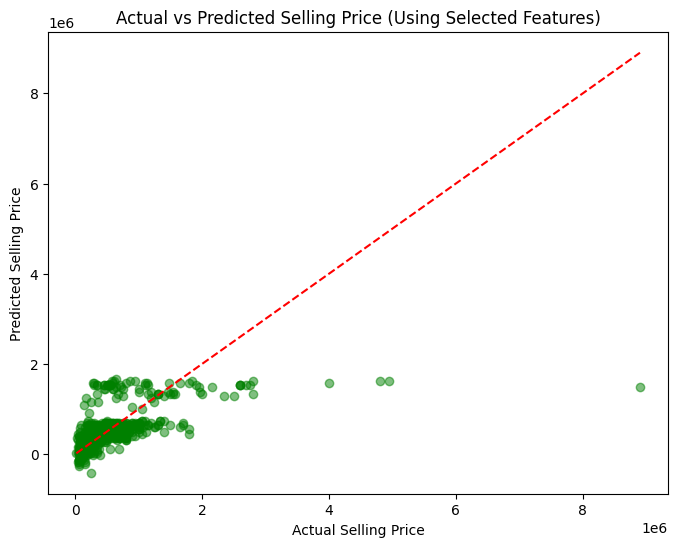

In [38]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_sel, y_pred_sel, color='green', alpha=0.5)
plt.plot([y_test_sel.min(), y_test_sel.max()], [y_test_sel.min(), y_test_sel.max()], color='red', linestyle='dashed')
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price (Using Selected Features)")
plt.show()



---

### **Summary of Steps**:
1. Import libraries for data manipulation, visualization, and machine learning.
2. Load and clean the dataset.
3. Encode categorical columns using `LabelEncoder`.
4. Visualize correlations and filter features based on a threshold.
5. Prepare X_features and target y_feature(last coloumn).
6. Split the data into training and testing sets.
7. Train two linear regression models (all features vs. selected features).
8. Make predictions using the trained models.
9. Evaluate the models using R² Score and MSE.
10. Visualize the actual vs predicted selling prices for both models.